In [1]:
!pip install gdown

In [2]:
!gdown 1B71jQjHCgPeywjMQeQzIQPEEEfX6oZ8t

Downloading...
From (original): https://drive.google.com/uc?id=1B71jQjHCgPeywjMQeQzIQPEEEfX6oZ8t
From (redirected): https://drive.google.com/uc?id=1B71jQjHCgPeywjMQeQzIQPEEEfX6oZ8t&confirm=t&uuid=d11f5534-2092-42a7-af9c-e4c0a4718b25
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 16.7MB/s]


In [4]:
!unzip digit.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [5]:
pip install numpy pillow tensorflow


Streaming output truncated to the last 5000 lines.
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104023.png  
  inflating: /content/DevanagariHandwritte

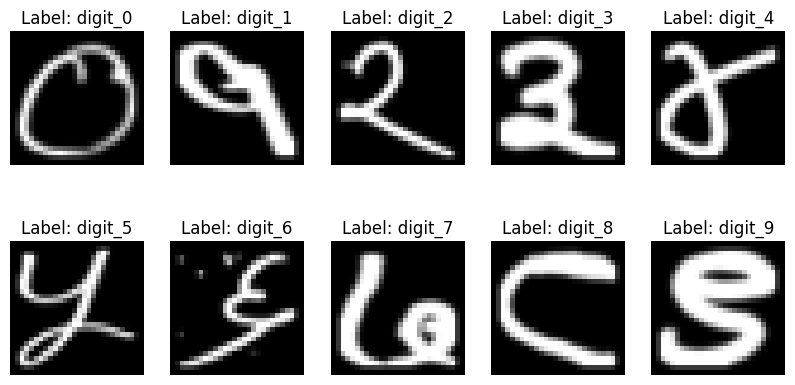

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from PIL import Image  # Import Pillow
import matplotlib.pyplot as plt

# Unzip dataset
!unzip digit.zip -d /content/

# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

# Load training and testing datasets
x_train, y_train, class_names = load_images_from_folder(train_dir)
x_test, y_test, _ = load_images_from_folder(test_dir)

# Reshape images for Keras input (adding channel dimension)
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize all digits
plt.figure(figsize=(10, 5))
for i, class_name in enumerate(class_names):
    img_index = np.where(y_train.argmax(axis=1) == i)[0][0]  # Get an index for each class
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[img_index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {class_name}")
    plt.axis("off")
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vector
    Dense(64, activation='sigmoid'),  # 1st hidden layer
    Dense(128, activation='sigmoid'),  # 2nd hidden layer
    Dense(256, activation='sigmoid'),  # 3rd hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]  # Use callbacks
)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2799 - loss: 1.9767

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2816 - loss: 1.9734 - val_accuracy: 0.0000e+00 - val_loss: 7.4876
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8329 - loss: 0.6001 - val_accuracy: 0.0000e+00 - val_loss: 9.0596
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9168 - loss: 0.2847 - val_accuracy: 0.0000e+00 - val_loss: 9.9943
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9507 - loss: 0.1801 - val_accuracy: 0.0000e+00 - val_loss: 10.4186


In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=128)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8161 - loss: 0.9168
Test Loss: 2.1132
Test Accuracy: 0.6560


In [11]:
# Save the trained model
model.save("devanagari_digit_recognition.h5")
print("Model saved successfully!")


Model saved successfully!


In [12]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("devanagari_digit_recognition.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [13]:
# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, batch_size=128)

print(f"Test Loss after reloading: {test_loss:.4f}")
print(f"Test Accuracy after reloading: {test_accuracy:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8161 - loss: 0.9168
Test Loss after reloading: 2.1132
Test Accuracy after reloading: 0.6560


In [14]:
import numpy as np

# Predict on test data
predictions = loaded_model.predict(x_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6126 - loss: 1.1192
Epoch 1: val_loss improved from inf to 11.07071, saving model to best_cnn_model.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.6143 - loss: 1.1145 - val_accuracy: 0.0000e+00 - val_loss: 11.0707
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9521 - loss: 0.1564
Epoch 2: val_loss did not improve from 11.07071
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9521 - loss: 0.1562 - val_accuracy: 0.0000e+00 - val_loss: 11.5041
Epoch 3/20
 96/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9696 - loss: 0.0979
Epoch 3: val_loss did not improve from 11.07071
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9700 - loss: 0.0972 - val_accuracy: 0.0000e+00 - val_loss: 12.0549
Epoch 4/20
 99/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0694
Epoch 4: val_loss did not improve from 11.07071
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9807 - loss: 0.0687 - val_accuracy: 0.0000e+00 - val_loss: 14.4398
Epoch 5/20
102/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9830 - loss: 0.0537
Epoch 5: val_loss did n

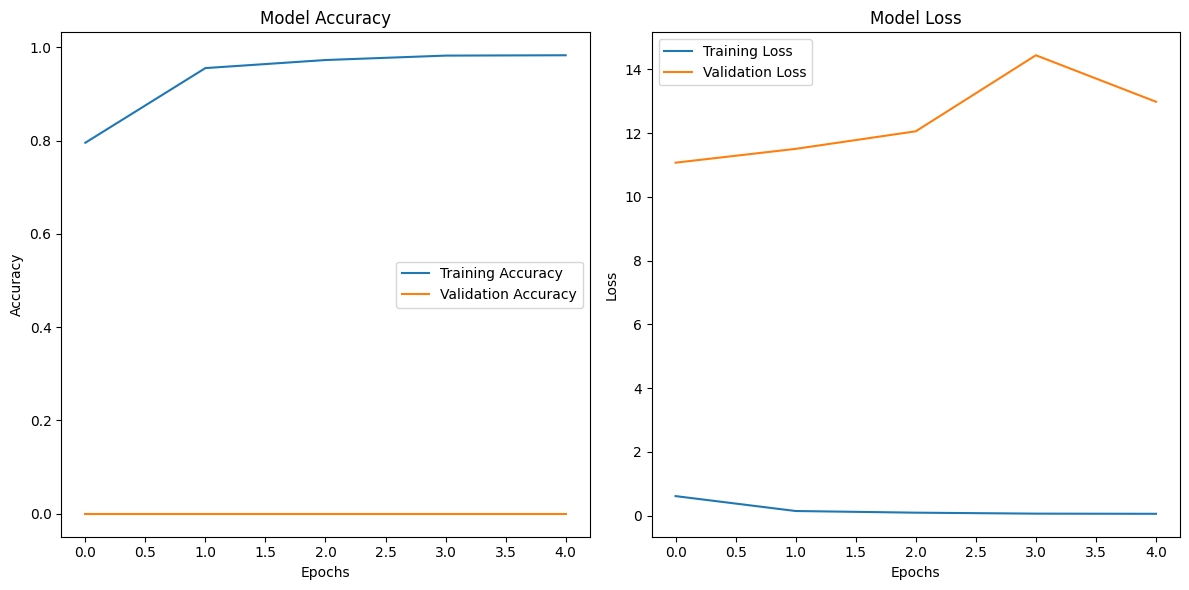

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Example: Input shape and number of classes (adjust to your dataset)
input_shape = (28, 28, 1)  # Use (32, 32, 3) for CIFAR-10
num_classes = 10

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
  # Use 'categorical_crossentropy' for one-hot labels
              metrics=['accuracy'])

# Define callbacks
checkpoint_callback = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpoint_callback, early_stopping_callback],
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


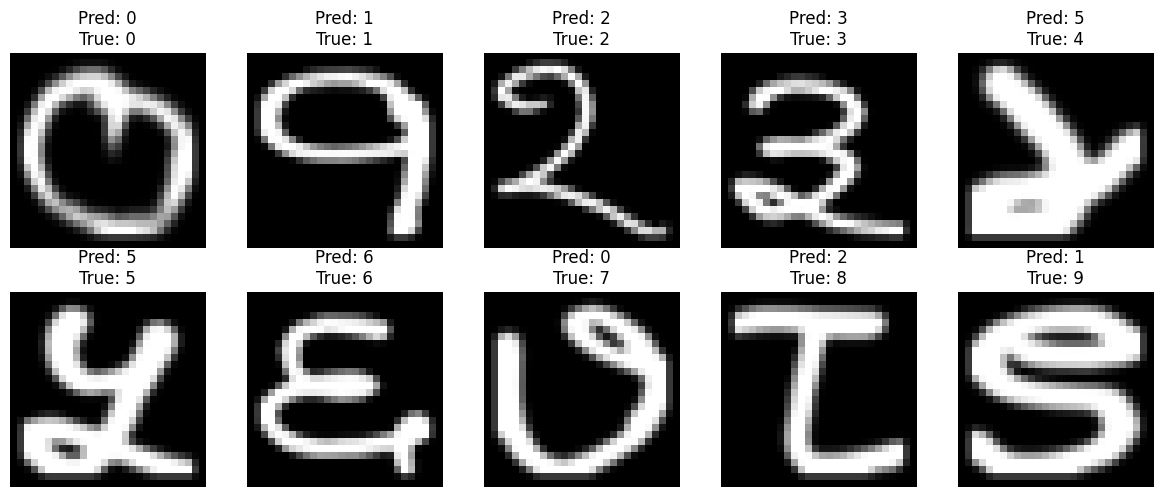

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded y_test back to class labels for comparison
true_labels = np.argmax(y_test, axis=1)

# Select one sample for each digit (0-9)
num_samples = 10
selected_indices = []

# Loop to select one sample for each digit (0-9)
for digit in range(10):
    digit_indices = np.where(true_labels == digit)[0]
    selected_index = np.random.choice(digit_indices)
    selected_indices.append(selected_index)

# Display the selected samples
plt.figure(figsize=(12, 5))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[index]}\nTrue: {true_labels[index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()